# Todos Histogramas



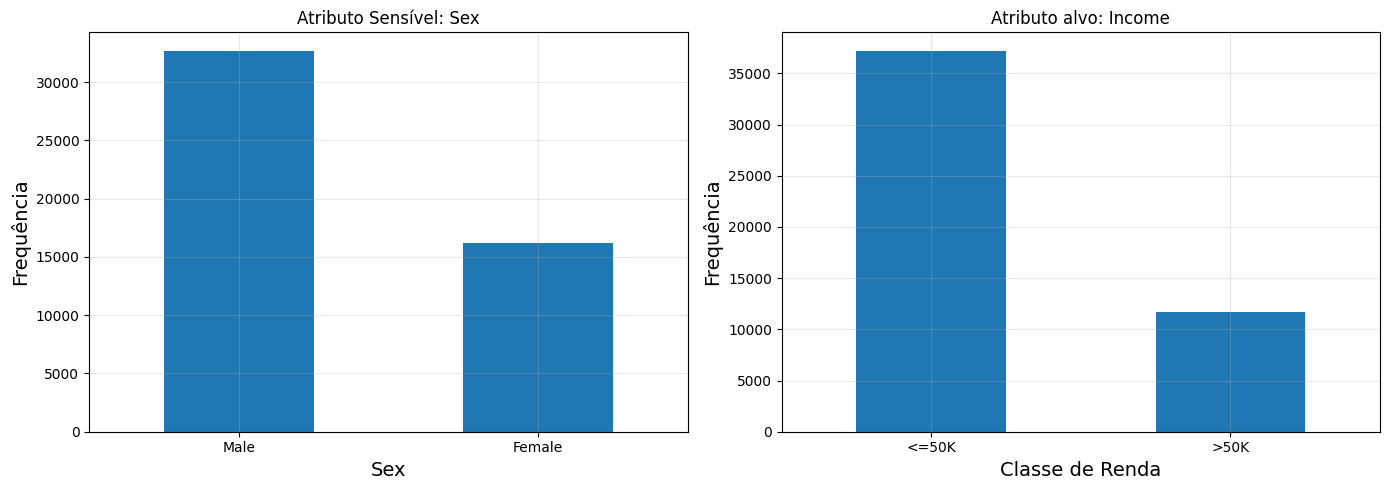

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ====== CONFIGURAÇÃO ======
csv_path = "adult_sklearn.csv"

columns = ["sex", "income"]

labels = {
    "sex": {
        "title": "Atributo Sensível: Sex",
        "xlabel": "Sex",
        "ylabel": "Frequência"
    },
    "income": {
        "title": "Atributo alvo: Income",
        "xlabel": "Classe de Renda",
        "ylabel": "Frequência"
    }
}

# ====== CARREGAR DADOS ======
df = pd.read_csv(csv_path)

# ====== CRIAR FIGURA (LADO A LADO) ======
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ====== PLOTS ======
for ax, col in zip(axes, columns):
    if pd.api.types.is_numeric_dtype(df[col]):
        ax.hist(df[col].dropna(), bins=60, edgecolor="black")
    else:
        df[col].value_counts().plot(kind="bar", ax=ax)

    ax.set_title(labels[col]["title"])
    ax.set_xlabel(labels[col]["xlabel"],fontsize=14)
    ax.set_ylabel(labels[col]["ylabel"],fontsize=14)
    ax.grid(alpha=0.3)
    ax.tick_params(axis="x", labelrotation=0)

plt.savefig("metod_hist_sensitive_income.jpg",format="jpg", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()


# Todos Histogramas


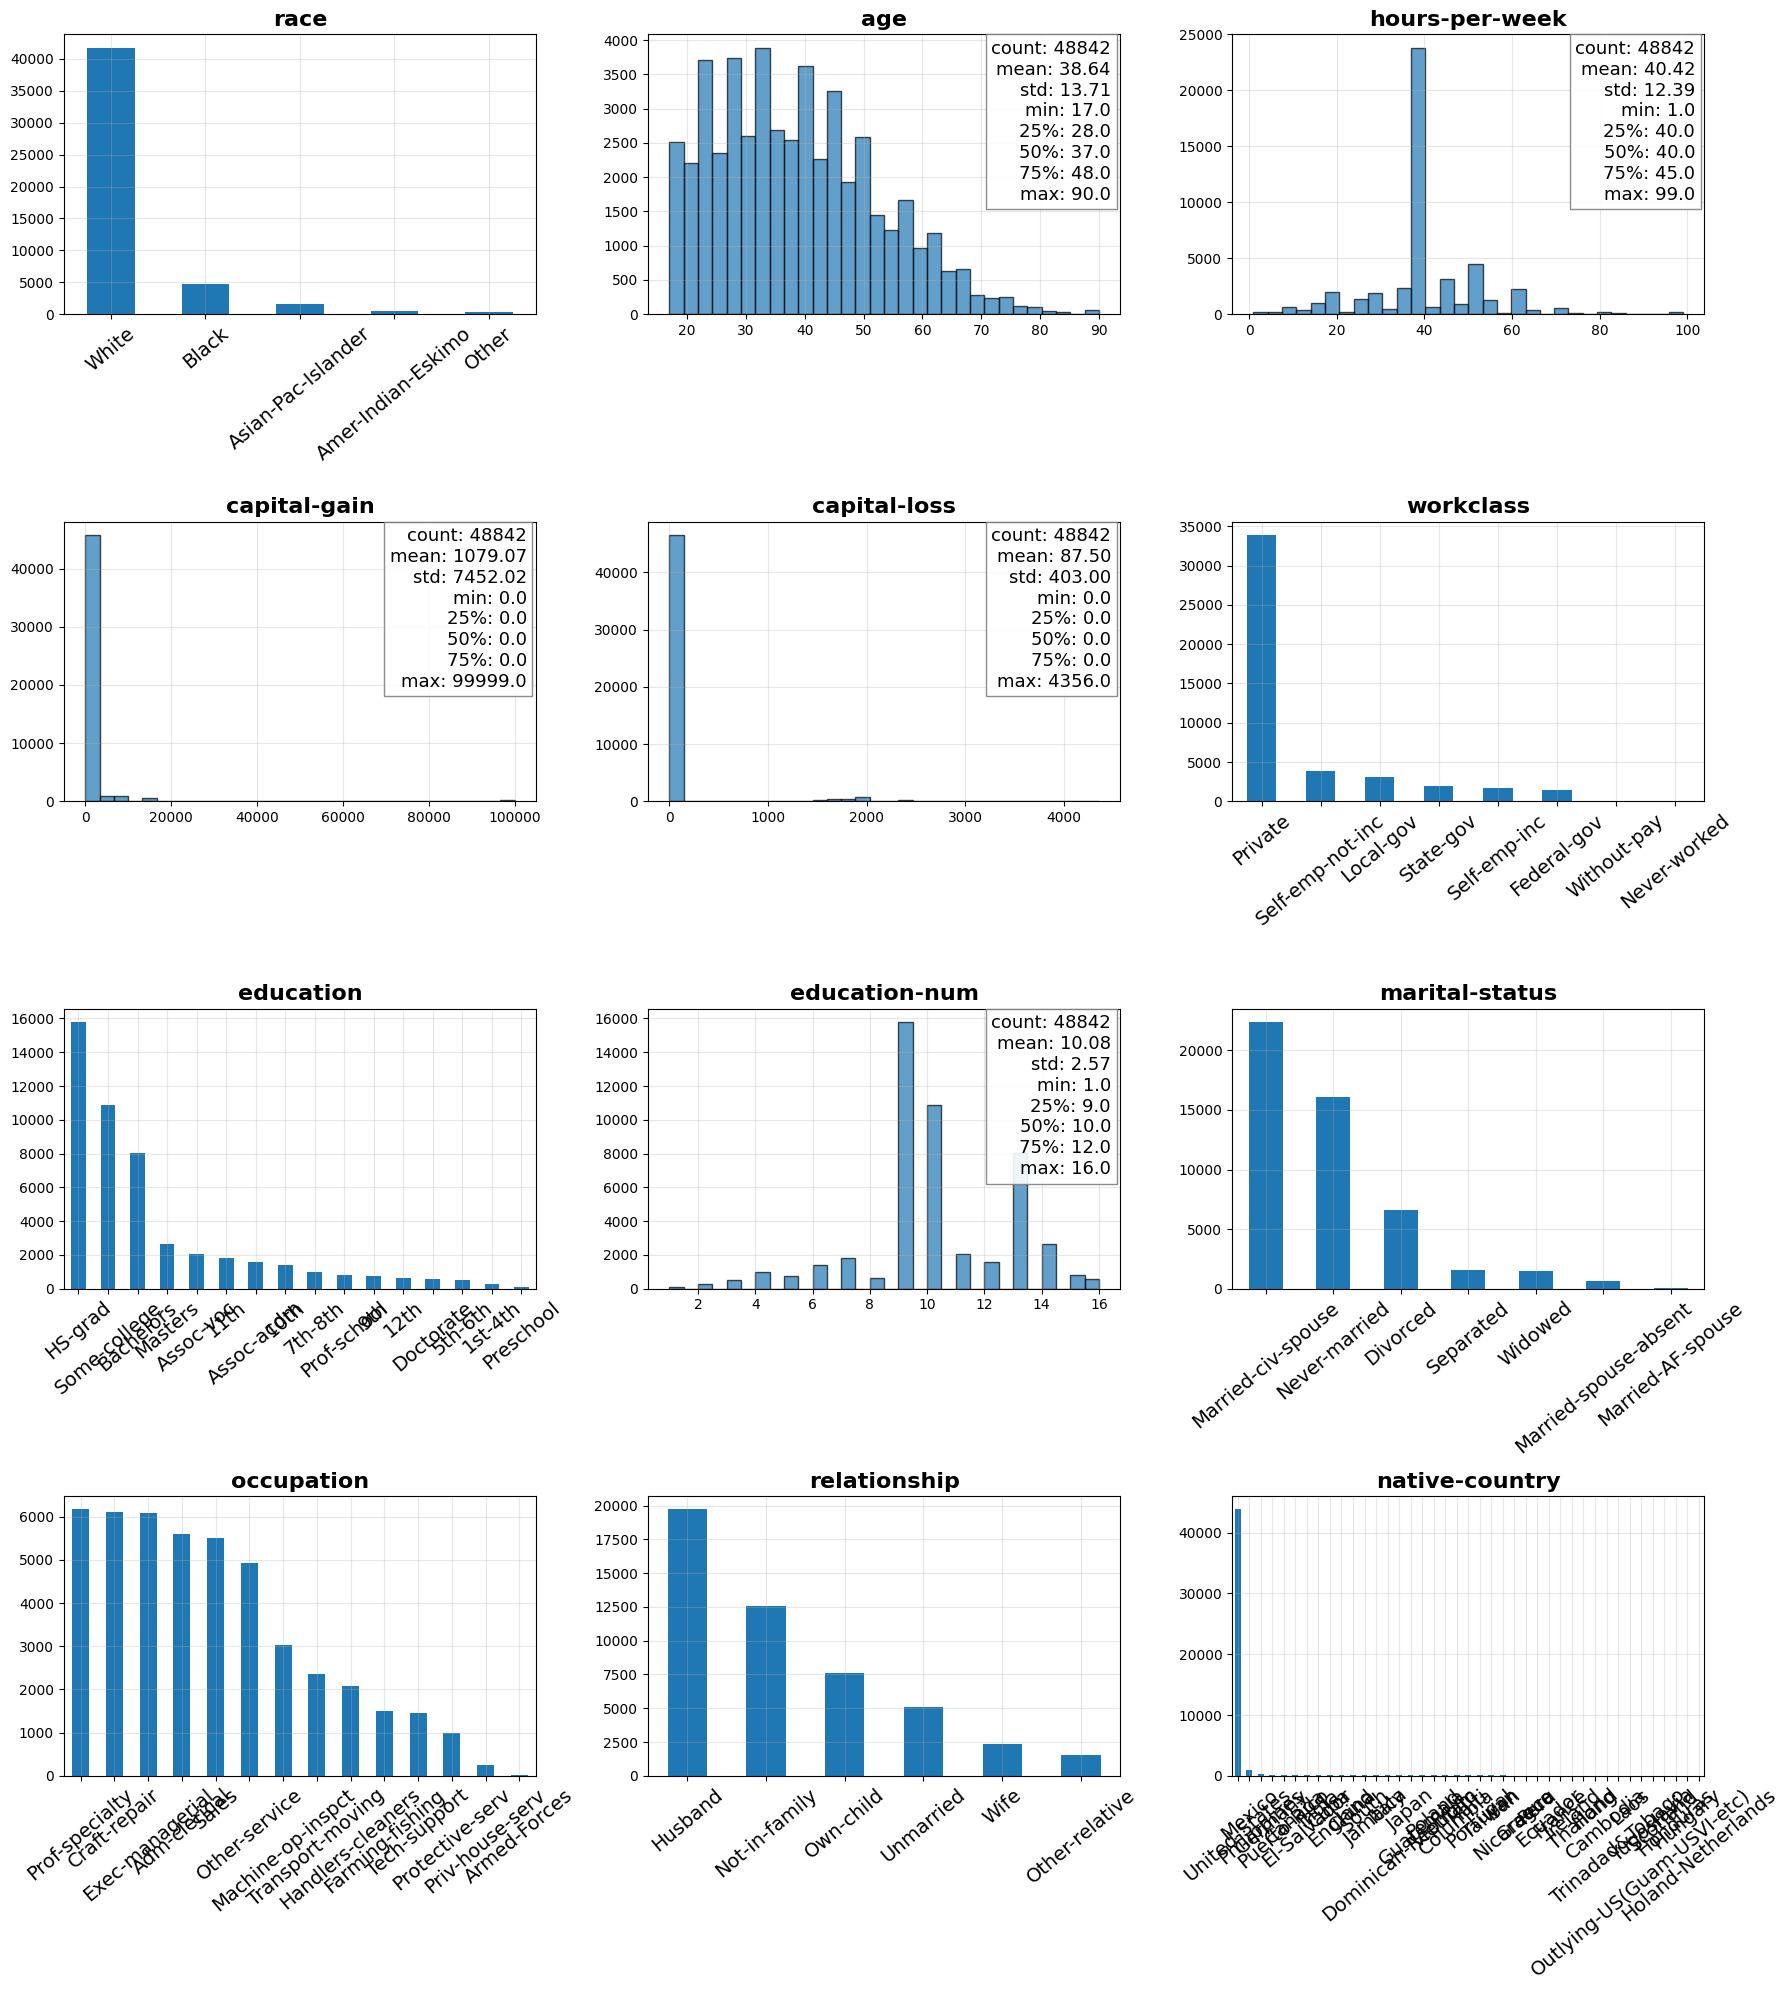

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# ====== CONFIGURAÇÃO ======
csv_path = "adult_sklearn.csv"
columns_to_plot = ["race","age", "hours-per-week", "capital-gain","capital-loss",	"workclass","education","education-num","marital-status","occupation","relationship","native-country"]


n_cols = 3  # Sweetviz normalmente distribui em grids

# ====== CARREGAR DATASET ======
df = pd.read_csv(csv_path)

# ====== DEFINIR GRID ======
n_rows = math.ceil(len(columns_to_plot) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# ====== FUNÇÃO PARA CAIXA ESTÁTISTICA SWEETVIZ-LIKE ======
def add_stats_box(ax, series):
    desc = series.describe()
    text = (
        f"count: {desc['count']:.0f}\n"
        f"mean: {desc.get('mean', float('nan')):.2f}\n"
        f"std: {desc.get('std', float('nan')):.2f}\n"
        f"min: {desc['min']}\n"
        f"25%: {desc.get('25%', float('nan'))}\n"
        f"50%: {desc.get('50%', float('nan'))}\n"
        f"75%: {desc.get('75%', float('nan'))}\n"
        f"max: {desc['max']}"
    )

    ax.text(
        0.98, 0.98, text,
        transform=ax.transAxes,
        fontsize=13,
        va='top', ha='right',
        bbox=dict(facecolor="white", edgecolor="gray", alpha=0.9)
    )

# ====== PLOT ESTILO SWEETVIZ ======
for idx, col in enumerate(columns_to_plot):
    ax = axes[idx]

    try:
        # Colunas numéricas: histograma
        if pd.api.types.is_numeric_dtype(df[col]):
            ax.hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor="black")
        else:
            # Colunas categóricas: barras de contagem
            df[col].value_counts().plot(kind="bar", ax=ax)
            plt.setp(ax.get_xticklabels(), rotation=40, ha="center",fontsize=14)
            ax.set_xlabel("")


        ax.set_title(f"{col}", fontsize=16, fontweight="bold")
        #ax.set_ylabel("Frequência",fontsize=13)
        ax.grid(alpha=0.3)

        # Caixa de estatísticas estilo "info box"
        add_stats_box(ax, df[col])

    except Exception as e:
        #ax.text(0.5, 0.5, f"Erro ao plotar {col}\n{e}", ha='center')
        pass

plt.tight_layout()
plt.savefig("metod_hist_features.jpg",format="jpg", dpi=300, bbox_inches="tight")

plt.show()

# Estatisticas


In [ ]:
import pandas as pd
import numpy as np

# 1. Carregar o dataset tratando o caractere '?' como valor nulo (NaN)
csv_path = "adult_sklearn.csv"
df = pd.read_csv(csv_path, na_values='?')

# 2. Lista para armazenar as métricas de cada coluna
resumo_dados = []

for coluna in df.columns:
    # Informações básicas comuns a todos os tipos
    contagem = df[coluna].count()
    faltantes = df[coluna].isnull().sum()
    n_categorias = df[coluna].nunique()

    # Identificar se é numérico ou categórico
    if pd.api.types.is_numeric_dtype(df[coluna]):
        tipo = "Num."
        media = f"{df[coluna].mean():.2f}"
        desvio = f"{df[coluna].std():.2f}"
        v_min = df[coluna].min()
        v_max = df[coluna].max()
        n_categorias = "-"

    else:
        tipo = "Cat."
        media = "-"
        desvio = "-"
        v_min = "-"
        v_max = "-"

    if media != "-":
        media_desvio = f"{media} ± {desvio}"
    else:
      media_desvio = "-"

    # Adicionar dicionário à lista
    resumo_dados.append({
        "Atributo": coluna,
        #"Qtd.": contagem, intancias: 48842
        "Tipo": tipo,
        "Faltantes": faltantes,
        "Qtd. Cat.": n_categorias,
        "Média ± Desvio": media_desvio
        #"Min": v_min,
        #"Max": v_max
    })

# 3. Criar o DataFrame de resumo
df_resumo = pd.DataFrame(resumo_dados)

# 4. Exibir o resultado
print(df_resumo.to_string(index=False))


      Atributo Tipo  Faltantes Qtd. Cat.        Média ± Desvio
           age Num.          0         -         38.64 ± 13.71
     workclass Cat.       2799         8                     -
        fnlwgt Num.          0         - 189664.13 ± 105604.03
     education Cat.          0        16                     -
 education-num Num.          0         -          10.08 ± 2.57
marital-status Cat.          0         7                     -
    occupation Cat.       2809        14                     -
  relationship Cat.          0         6                     -
          race Cat.          0         5                     -
           sex Cat.          0         2                     -
  capital-gain Num.          0         -     1079.07 ± 7452.02
  capital-loss Num.          0         -        87.50 ± 403.00
hours-per-week Num.          0         -         40.42 ± 12.39
native-country Cat.        857        41                     -
        income Cat.          0         2               

In [ ]:
import pandas as pd
import numpy as np

def analisar_dataset(df, nome_label):
    # 1. Total de Instâncias
    total_instancias = len(df)

    # 2. Total de Colunas
    total_colunas = df.shape[1]

    # 3. Linhas com pelo menos um dado faltante
    # (Soma as linhas onde o total de nulos naquela linha é > 0)
    linhas_com_faltantes = df.isnull().any(axis=1).sum()

    # 4. Tipagem das colunas
    num_cols = df.select_dtypes(include=[np.number]).shape[1]
    cat_cols = df.select_dtypes(exclude=[np.number]).shape[1]

    # 5. Total de valores nulos (células vazias)
    total_nulos_celulas = df.isnull().sum().sum()

    return {
        "Métrica": [
            "Total de instâncias",
            "Instâncias com dados faltantes",
            "Total de atributos",
            "Atributos nulos",
            "Atributos numéricos",
            "Atributos categóricos"
        ],
        nome_label: [
            total_instancias,
            linhas_com_faltantes,
            total_colunas,
            total_nulos_celulas,
            num_cols,
            cat_cols
        ]
    }

def comparar(path_antes, path_depois):
    # Carregando os dados
    # Tratando '?' como NaN para o dataset original
    df_antes = pd.read_csv(path_antes, na_values='?')
    df_depois = pd.read_csv(path_depois)

    # Verifica quais colunas têm nulos e quantas linhas
    nulos_por_coluna = df_depois.isnull().sum()
    print(nulos_por_coluna[nulos_por_coluna > 0])

    # Mostra as primeiras 5 linhas que contêm qualquer valor nulo
    print("\nExemplo de linhas com dados faltantes:")
    print(df_depois[df_depois.isnull().any(axis=1)].head())

    # Gerando as análises
    resumo_antes = analisar_dataset(df_antes, "Original")
    resumo_depois = analisar_dataset(df_depois, "Processado")

    # Criando DataFrames e unindo-os pela coluna 'Métrica'
    df_comp_1 = pd.DataFrame(resumo_antes)
    df_comp_2 = pd.DataFrame(resumo_depois)

    tabela_final = pd.merge(df_comp_1, df_comp_2, on="Métrica")
    print("\n" + "="*60)
    print("RELATÓRIO COMPARATIVO - PRÉ VS PÓS PROCESSAMENTO")
    print("="*60)
    print(tabela_final.to_string(index=False))
    print("="*60)

    # Explicação sobre o One-Hot Encoding
    diff_cols = tabela_final.iloc[1, 2] - tabela_final.iloc[1, 1]
    print(f"\nNota técnica: O aumento de {diff_cols} colunas e a redução de colunas categóricas")
    print("para zero indicam a aplicação bem-sucedida do One-Hot Encoding.")

dataset_antes = "/content/adult_sklearn.csv"
dataset_depois = "/content/df_pos_processamento.csv"
comparar(dataset_antes, dataset_depois)


FileNotFoundError: [Errno 2] No such file or directory: '/content/df_pos_processamento.csv'

In [ ]:

import pandas as pd
import numpy as np

def analisar_dataset_csv(descricao, nome_arquivo):
    df = pd.read_csv(nome_arquivo)

    # Identificar tipos de colunas
    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    # Separar numéricas contínuas e binárias (0/1)
    bin_cols = [c for c in num_cols if set(df[c].dropna().unique()).issubset({0, 1})]
    cont_cols = [c for c in num_cols if c not in bin_cols]
    other_cols = df.columns.difference(num_cols.union(cat_cols))

    # Calcular nulos
    total_nulos = int(df.isnull().sum().sum())
    linhas_com_nulo = int(df.isnull().any(axis=1).sum())

    # Dicionário base
    dados = {
        "linhas": df.shape[0],
        "linhas_com_nulos": linhas_com_nulo,
        "colunas": df.shape[1],
        "numericas_continuas": len(cont_cols),
        "binarias_one_hot": len(bin_cols),
        "categoricas_texto": len(cat_cols),
        "outras": len(other_cols),
        "nulos_totais": total_nulos
    }

    # Contagem 0/1 em label_bin e protected_bin

    if "label_bin" in df.columns:
        dados["label_0 (<=50K)"] = int((df["label_bin"] == 0).sum())
        dados["label_1 (>50K)"] = int((df["label_bin"] == 1).sum())
    else:
        dados["label_0 (<=50K)"] = "—"
        dados["label_1 (>50K)"] = "—"

    if "protected_bin" in df.columns:
        dados["protected_0 (female)"] = int((df["protected_bin"] == 0).sum())
        dados["protected_1 (male)"] = int((df["protected_bin"] == 1).sum())
    else:
        dados["protected_0 (female)"] = "—"
        dados["protected_1 (male)"] = "—"

    # Contagem por categoria em sex
    if "sex" in df.columns:
        dados["protected_0 (female)"] = int((df["sex"] == "Female").sum())
        dados["protected_1 (male)"] = int((df["sex"] == "Male").sum())

    # Contagem por categoria em Income
    if "income" in df.columns:
        dados["label_0 (<=50K)"] = int((df["income"] == "<=50K").sum())
        dados["label_1 (>50K)"] = int((df["income"] == ">50K").sum())

    # Converter para DataFrame e transpor
    resumo = pd.DataFrame(dados, index=[descricao]).T
    return resumo


def analisar_previsoes_csv(descricao, nome_arquivo):
    df = pd.read_csv(nome_arquivo)

    # Identificar tipos de colunas
    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    # Separar numéricas contínuas e binárias (0/1)
    bin_cols = [c for c in num_cols if set(df[c].dropna().unique()).issubset({0, 1})]
    cont_cols = [c for c in num_cols if c not in bin_cols]
    other_cols = df.columns.difference(num_cols.union(cat_cols))

    # Calcular nulos
    total_nulos = int(df.isnull().sum().sum())
    linhas_com_nulo = int(df.isnull().any(axis=1).sum())

    # Dicionário base
    dados = {
        "linhas": df.shape[0],
        "linhas_com_nulos": linhas_com_nulo,
        "colunas": df.shape[1],
        "numericas_continuas": len(cont_cols),
        "binarias_one_hot": len(bin_cols),
        "categoricas_texto": len(cat_cols),
        "outras": len(other_cols),
        "nulos_totais": total_nulos
    }

    # Contagem 0/1 em label_bin e protected_bin


    if "y_test" in df.columns:
        dados["y_test_0"] = int((df["y_test"] == 0).sum())
        dados["y_test_1"] = int((df["y_test"] == 1).sum())
    else:
        dados["y_test_0"] = "—"
        dados["y_test_1"] = "—"

    if "y_pred" in df.columns:
        dados["y_pred_0"] = int((df["y_pred"] == 0).sum())
        dados["y_pred_1"] = int((df["y_pred"] == 1).sum())
    else:
        dados["y_pred_0"] = "—"
        dados["y_pred_1"] = "—"


    if "A_test" in df.columns:
        dados["A_test_0"] = int((df["A_test"] == 0).sum())
        dados["A_test_1"] = int((df["A_test"] == 1).sum())
    else:
        dados["A_test_0"] = "—"
        dados["A_test_1"] = "—"


    # Converter para DataFrame e transpor
    resumo = pd.DataFrame(dados, index=[descricao]).T
    return resumo


dataset_train = "/content/adult_sklearn_train.csv"
dataset_test = "/content/adult_sklearn_test.csv"
dataset_in_pre = "/content/xgboost__pre-reweighing__in-none__post-reject_option_classification_1_entrada_pre_mitigacao.csv"
dataset_out_pre = "/content/xgboost__pre-reweighing__in-none__post-reject_option_classification_2_saida_pre_mitigacao.csv"
dataset_in_post = "/content/xgboost__pre-reweighing__in-none__post-reject_option_classification_3_entrada_post_mitigacao.csv"
dataset_out_post = "/content/xgboost__pre-reweighing__in-none__post-reject_option_classification_4_saida_post_mitigacao.csv"

################## COMPARAR AS ENTRADAS DO POS (OU SEJA, PÓS MODELO) COM CADA MÉTODO PRE. ISTO PQ O REW N ALTERA NADA

print("---- DATASET DE TREINO ----\n")
tab1 = analisar_dataset_csv("Train", dataset_train)
tab2 = analisar_dataset_csv("Entrada Pré", dataset_in_pre)
tab3 = analisar_dataset_csv("Saida Pré", dataset_out_pre)
# Combinar resultados lado a lado
resultado_pre = pd.concat([tab1, tab2, tab3], axis=1)
print(resultado_pre)

print("\n\n---- DATASET DE TEST ----\n")
tab4 = analisar_dataset_csv("Test", dataset_test)
resultado_test = pd.concat([tab4], axis=1)
print(resultado_test)

print("\n\n---- PREVISÕES do TESTE ----\n")
tab5 = analisar_previsoes_csv("Entrada Pos", dataset_in_post)
tab6 = analisar_previsoes_csv("Saida Pos", dataset_out_post)
resultado_post = pd.concat([tab5, tab6], axis=1)

print(resultado_post)




In [ ]:
import matplotlib.pyplot as plt

def plot_histograma_csv2(nome_arquivo, coluna, bins=20, titulo=None, cor='skyblue'):
    """
    Lê um CSV e plota um histograma da coluna especificada.

    Parâmetros:
        nome_arquivo (str): caminho ou nome do CSV
        coluna (str): nome da coluna a ser plotada
        bins (int): número de intervalos do histograma
        titulo (str): título do gráfico (opcional)
        cor (str): cor das barras do histograma (opcional)
    """
    # Ler CSV
    df = pd.read_csv(nome_arquivo)

    # Verificar se a coluna existe
    if coluna not in df.columns:
        print(f"Erro: coluna '{coluna}' não encontrada no CSV.")
        return

    # Plotar histograma
    plt.figure(figsize=(8,5))
    plt.hist(df[coluna].dropna(), bins=bins, color=cor, edgecolor='black')
    plt.xlabel(coluna)
    plt.ylabel("Frequência")
    plt.title(titulo if titulo else f"Histograma de {coluna}")
    plt.show()

def plot_histograma_csv(nome_arquivo, coluna, bins=20, titulo=None, cor='skyblue'):
    """
    Lê um CSV e plota um histograma da coluna especificada.
    Mostra também a contagem de 0s e 1s, se aplicável.

    Parâmetros:
        nome_arquivo (str): caminho ou nome do CSV
        coluna (str): nome da coluna a ser plotada
        bins (int): número de intervalos do histograma
        titulo (str): título do gráfico (opcional)
        cor (str): cor das barras do histograma (opcional)
    """
    # Ler CSV
    df = pd.read_csv(nome_arquivo)

    # Verificar se a coluna existe
    if coluna not in df.columns:
        print(f"Erro: coluna '{coluna}' não encontrada no CSV.")
        return

    # Contagem de valores
    print(f"\nContagem de valores na coluna '{coluna}':")
    counts = df[coluna].value_counts(dropna=False)
    print(counts)

    # Caso específico: contar 0s e 1s
    if set(df[coluna].dropna().unique()).issubset({0, 1}):
        n_zeros = (df[coluna] == 0).sum()
        n_uns = (df[coluna] == 1).sum()
        print(f"\nTotal de 0s: {n_zeros}")
        print(f"Total de 1s: {n_uns}")

    # Plotar histograma
    plt.figure(figsize=(8,5))
    plt.hist(df[coluna].dropna(), bins=bins, color=cor, edgecolor='black')
    plt.xlabel(coluna)
    plt.ylabel("Frequência")
    plt.title(titulo if titulo else f"Histograma de {coluna}")
    plt.show()

plot_histograma_csv(dataset_in_post,"y_proba" )

plot_histograma_csv("/content/xgboost__pre-disparate_impact_remover__in-none__post-equalized_odds_postprocessing_3_entrada_post_mitigacao.csv","y_pred" )
plot_histograma_csv("/content/xgboost__pre-disparate_impact_remover__in-none__post-none_3_entrada_post_mitigacao.csv","y_pred" )
plot_histograma_csv("/content/xgboost__pre-disparate_impact_remover__in-none__post-reject_option_classification_3_entrada_post_mitigacao.csv","y_pred" )
plot_histograma_csv("/content/xgboost__pre-none__in-none__post-equalized_odds_postprocessing_3_entrada_post_mitigacao.csv","y_pred" )
plot_histograma_csv("/content/xgboost__pre-none__in-none__post-none_3_entrada_post_mitigacao.csv","y_pred" )
plot_histograma_csv("/content/xgboost__pre-none__in-none__post-reject_option_classification_3_entrada_post_mitigacao.csv","y_pred" )
plot_histograma_csv("/content/xgboost__pre-reweighing__in-none__post-equalized_odds_postprocessing_3_entrada_post_mitigacao.csv","y_pred" )
plot_histograma_csv("/content/xgboost__pre-reweighing__in-none__post-reject_option_classification_3_entrada_post_mitigacao.csv","y_pred" )
plot_histograma_csv("/content/xgboost__pre-reweighing__in-none__post-none_3_entrada_post_mitigacao.csv","y_proba" )


In [ ]:
import pandas as pd

def analisar_csv(descricao, nome_arquivo):

        # Lê o CSV
        df = pd.read_csv(nome_arquivo)

        print("#descricao")

        print("=== Informações Gerais ===")
        print(f"Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")

        # Identificar tipos de colunas
        num_cols = df.select_dtypes(include=['number']).columns
        cat_cols = df.select_dtypes(include=['object', 'category']).columns
        other_cols = df.columns.difference(num_cols.union(cat_cols))

        print("\n=== Tipos de Colunas ===")
        print(f"Numéricas:  {len(num_cols)}  → {list(num_cols)}")
        print(f"Categóricas: {len(cat_cols)}  → {list(cat_cols)}")
        print(f"Outras:      {len(other_cols)}  → {list(other_cols)}")

        print("\n=== Valores Nulos por Coluna ===")
        print(df.isnull().sum())

        print("\n=== Estatísticas Numéricas ===")
        if len(num_cols) > 0:
            print(df[num_cols].describe())
        else:
            print("Nenhuma coluna numérica encontrada.")

        print("\n=== Estatísticas Categóricas ===")
        if len(cat_cols) > 0:
            print(df[cat_cols].describe())
        else:
            print("Nenhuma coluna categórica encontrada.")

        #return df

analisar_csv("Entrada","/content/adult_sklearn_train.csv")

analisar_csv("Saída Pré-Processamento","/content/bernoulli_nb__pre-disparate_impact_remover__in-none__post-equalized_odds_postprocessing_1_entrada_pre_mitigacao.csv")


In [ ]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name="adult", version=1, as_frame=True)
X, y = data.data, data.target

print("Tamanho total:", len(X))


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# --- 1. Baixa o dataset Adult ---
data = fetch_openml(name="adult", version=2, as_frame=True)
df = data.frame.copy()

# --- 2. Limpeza e label ---
df = df.replace("?", np.nan).dropna()

# Detecta coluna de renda
target_col = [c for c in df.columns if "income" in c or "class" in c][0]
print("Coluna alvo detectada:", target_col)

df["income"] = (df[target_col] == ">50K").astype(int)

# --- 3. Definições ---
protected = "sex"
target = "income"

X = df.drop(columns=[target])
y = df[target]

categorical = X.select_dtypes("category").columns.tolist() + X.select_dtypes("object").columns.tolist()
numeric = X.select_dtypes("number").columns.tolist()

# --- 4. Split treino/teste ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# --- 5. Função de experimento ---
def run_experiment(include_fnlwgt=True):
    use_cols = X.columns.tolist()
    if not include_fnlwgt and "fnlwgt" in use_cols:
        use_cols.remove("fnlwgt")

    cat_features = [c for c in categorical if c in use_cols]
    num_features = [c for c in numeric if c in use_cols]

    preprocessor = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features)
    ])

    clf = Pipeline([
        ("prep", preprocessor),
        ("model", LogisticRegression(max_iter=1000))
    ])

    clf.fit(X_train[use_cols], y_train)
    y_pred = clf.predict(X_test[use_cols])

    acc = accuracy_score(y_test, y_pred)

    # --- Fairness metric ---
    df_eval = X_test.copy()
    df_eval["y_pred"] = y_pred
    df_eval["y_true"] = y_test.values

    rate_priv = df_eval[df_eval[protected] == "Male"]["y_pred"].mean()
    rate_unpriv = df_eval[df_eval[protected] == "Female"]["y_pred"].mean()
    disparate_impact = rate_unpriv / rate_priv

    return {
        "include_fnlwgt": include_fnlwgt,
        "accuracy": acc,
        "disparate_impact": disparate_impact
    }

# --- 6. Rodar ---
results = pd.DataFrame([
    run_experiment(include_fnlwgt=True),
    run_experiment(include_fnlwgt=False)
])

print(results)
